#  Sparse (shrinkage) priors

_Adapted from Josep Fortiana (2023-04-24) by Jordi Abante (2024-04-19)_

# Bell-shaped pdf's:

# Normal, Cauchy, Student's $ t$, Logistic, Laplace, _horseshoe_

## Cauchy distribution

A r.v. $ X$, with support on $\mathbb{R}$ follows the  Cauchy distribution, $\cauchydist(\mu,\sigma)$, with  _location parameter_ $\mu\in\mathbb{R}$ and scale parameter $\sigma>0$, $t(\nu,\mu,\sigma)$, if it is absolutely continuous, with pdf:

_Cauchy distribution_ is another name for $ t(1)$, Student's $t$ with 1 degree of freedom.

The pdf is:

$$
    f(x \CondTo \mu,\sigma)=\dfrac{1}{\pi\,\sigma\big[1+\big(\frac{x-\mu}{\sigma}\big)^{2}\big]}
$$

## The Half-Cauchy distribution

The _Half-Cauchy_ distribution $\halfcauchydist (\mu,\sigma)$ has not a bell-shaped pdf, but it is included here both because it is used below to describe the horseshoe distribution and, of course it is derived from the Cauchy distribution: it is a Cauchy distribution truncated to only have nonzero probability density for values greater than or equal to the location of the peak.

The Half-Cauchy distribution with $\mu=0$ is a useful prior for nonnegative parameters that may be very large, as allowed by the very heavy tails of the Half-Cauchy distribution.

In Stan, a Half-Cauchy is defined by putting a lower bound of $\mu$ on the variable and then using a Cauchy distribution with location parameter $\mu$.

The pdf is:

$$
    f(x \CondTo \mu,\sigma)=\left\{
    \begin{array}{ll}
    \dfrac{2}{\pi\,\sigma\,\big[1+\big(\frac{x−\mu}{\sigma}\big)^{2}\big]}, &\text{if}\mskip10mu x\geq\mu\\[0.4cm]
    0,                                                                      &\text{otherwise.}
    \end{array}\right.
$$

## Student's $ t$ distribution

A r.v. $ X$, with support on $\mathbb{R}$ follows the  _Student's_ $t$ distribution with _location parameter_ $\mu\in\mathbb{R}$, scale parameter $\sigma>0$, 
and $\nu>0$ _degrees of freedom,_ $\tdist (\mu,\sigma,\nu)$, if it is absolutely continuous, with pdf:

$$
    f(x)=\dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)}
    {\Gamma\left(\dfrac{\nu}{2}\right)\,\sqrt{\pi\,\nu}\,\sigma}\,
    \left(1+\dfrac{1}{\nu}\left(\dfrac{x-\mu}{\sigma}\right)^{2}\right)^{-\frac{\nu+1}{2}}
    ,\mskip30mu x\in\mathbb{R}.
$$

This $X$ is the result of applying a translation by $\mu$ and scaling by $\sigma$ to a _standard Student's_ $t$ r.v. with $\nu>0$ _degrees of freedom,_  $t(\nu)$, whose pdf is that from above with $\mu=0$ and $\sigma=1$. 

$$
    f(x)=\dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)}
    {\Gamma\left(\dfrac{\nu}{2}\right)\,\sqrt{\pi\,\nu}}\,
    \left(1+\dfrac{x^{2}}{\nu}\right)^{-\frac{\nu+1}{2}}
    ,\mskip30mu x\in\mathbb{R}.
$$


As its name and origin suggests, usually $\nu\in\mathbb{N}$.

#### Caution

Moments of order $ k$, $\operatorname{E}(X^{k})$ of $X\sim t(\nu)$ exist only for $k<\nu$. In particular, a Cauchy r.v. has neither expectation (nor variance, etc). For $X\sim t(\nu)$ variance exists only when $\nu>2$ and then:

$$
    \operatorname{E}(X)=0,\mskip40mu
    \operatorname{var}(X)=\dfrac{\nu}{\nu-2}.
$$

This property is associated with the fact that, for small $\nu$, this family of distributions has _heavy tails,_ meaning that there is a significant probability of registering values very far from its geometric center. As $\nu$ increases$t(\nu)\rightarrow\operatorname{N}(0,1)$, Students's $t$ distribution approaches the normal.

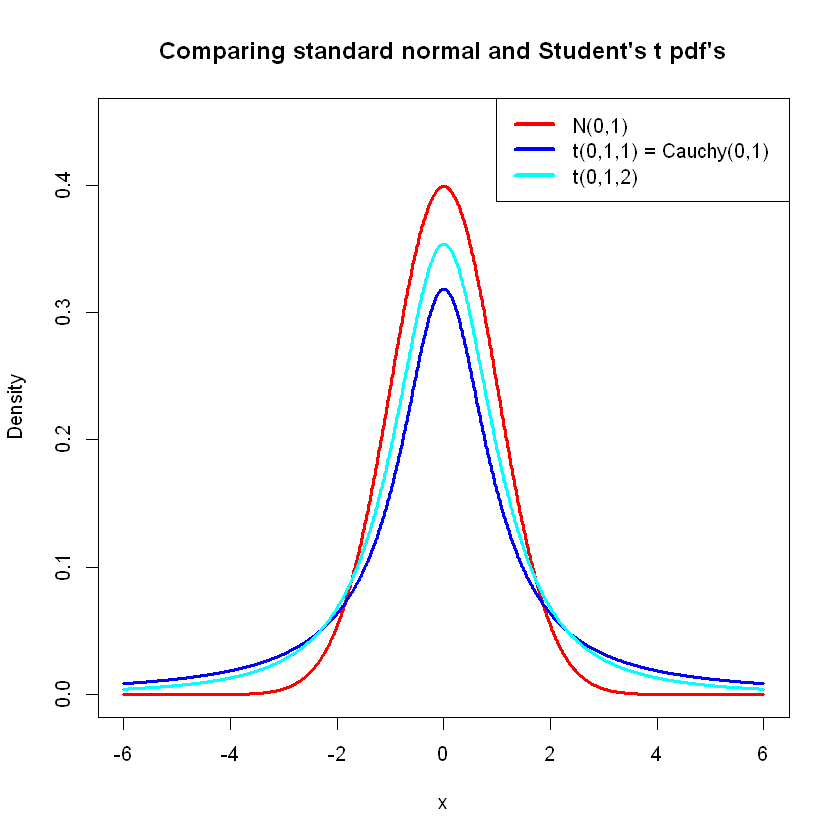

In [1]:
# options(repr.plot.width=9,repr.plot.height=9)
u<-seq(-6,6,length=1000)
plot(u,dnorm(u),type="l",lwd=3.0,col="red",xlab="x",ylab="Density",ylim=c(0,0.45),
    main="Comparing standard normal and Student's t pdf's")
lines(u,dt(u,df=1),lwd=3.0,col="blue")
lines(u,dt(u,df=2),lwd=3.0,col="cyan")
legend("topright",c("N(0,1)","t(0,1,1) = Cauchy(0,1)","t(0,1,2)"),lwd=3.5,col=c("red","blue","cyan"))

## Logistic distribution

A r.v. $ X$, with support on $\mathbb{R}$ follows the _Logistic_ distribution with location parameter $\mu\in\mathbb{R}$ and scale parameter $\sigma>0$ if it is absolutely continuous, with pdf:

$$
    f(x)=\dfrac{1}{\sigma}\,
    \dfrac{\exp\left(-\dfrac{x-\mu}{\sigma}\right)}
    {1+\exp\left(-\dfrac{x-\mu}{\sigma}\right)}
    =\dfrac{1}{4\,\sigma}\,
    \operatorname{sech}^{2}\left(\dfrac{x-\mu}{2\,\sigma}\right),\mskip30mu x\in\mathbb{R}.
$$

Its cdf is the _Logistic function,_ (translated by $\mu$ and scaled by $\sigma$).

If $ X\sim\operatorname{Logistic}(\mu,\sigma)$,

$$
\operatorname{E}(X)=\mu,\mskip40mu \operatorname{var}(X)=\dfrac{\sigma^{2}\,\pi^{2}}{3}.
$$

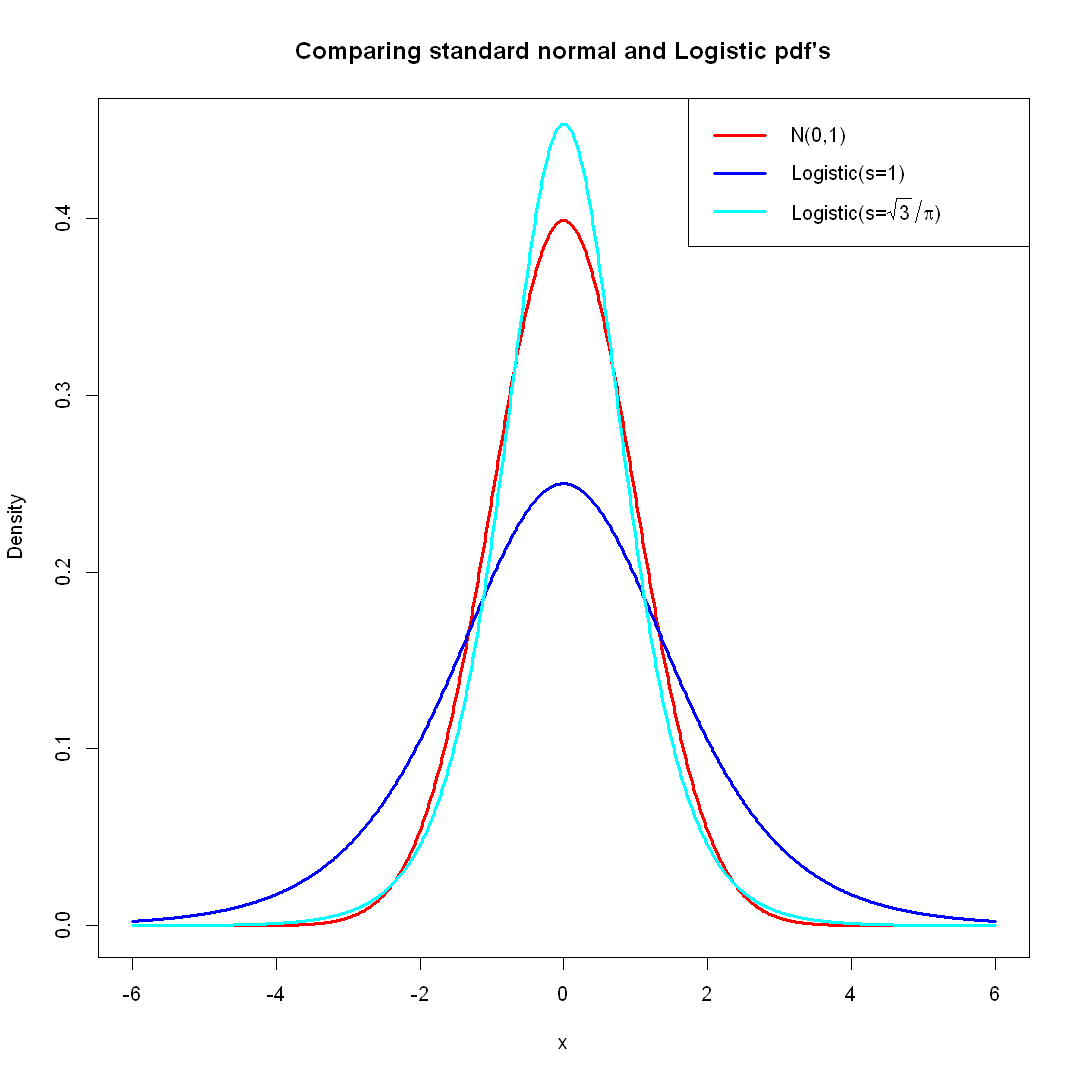

In [2]:
options(repr.plot.width=9,repr.plot.height=9)
u<-seq(-6,6,length=1000)
plot(u,dnorm(u),type="l",lwd=3.0,col="red",xlab="x",ylab="Density",ylim=c(0,0.45),
    main="Comparing standard normal and Logistic pdf's")
lines(u,dlogis(u),lwd=2.5,col="blue")
lines(u,dlogis(u,scale=sqrt(3)/pi),lwd=2.5,col="cyan")
legend("topright",c("N(0,1)","Logistic(s=1)",expression(paste("Logistic(s=",sqrt(3)/pi,")"))),
       lwd=2.5,col=c("red","blue","cyan"))

## Laplace distribution

A r.v. $ X$, with support on $\mathbb{R}$ follows the _Laplace_ or _double exponential_ distribution, $\dexpdist(\mu,\sigma)$ or $\laplacedist(\mu,s)$, with _location parameter_ $\mu\in\mathbb{R}$ and  _scale parameter_ $s>0$ if it is absolutely continuous, with pdf:

$$
    f(x)=\dfrac{1}{2\,s}\,\exp\left(-\dfrac{|x-\mu|}{s}\right),\mskip30mu x\in\mathbb{R}.
$$

If $ X\sim\laplacedist(\mu,s)$,

$$
\operatorname{E}(X)=\mu,\mskip40mu \operatorname{var}(X)=2\,s^{2}.
$$

In [3]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(extraDistr,quietly=TRUE)

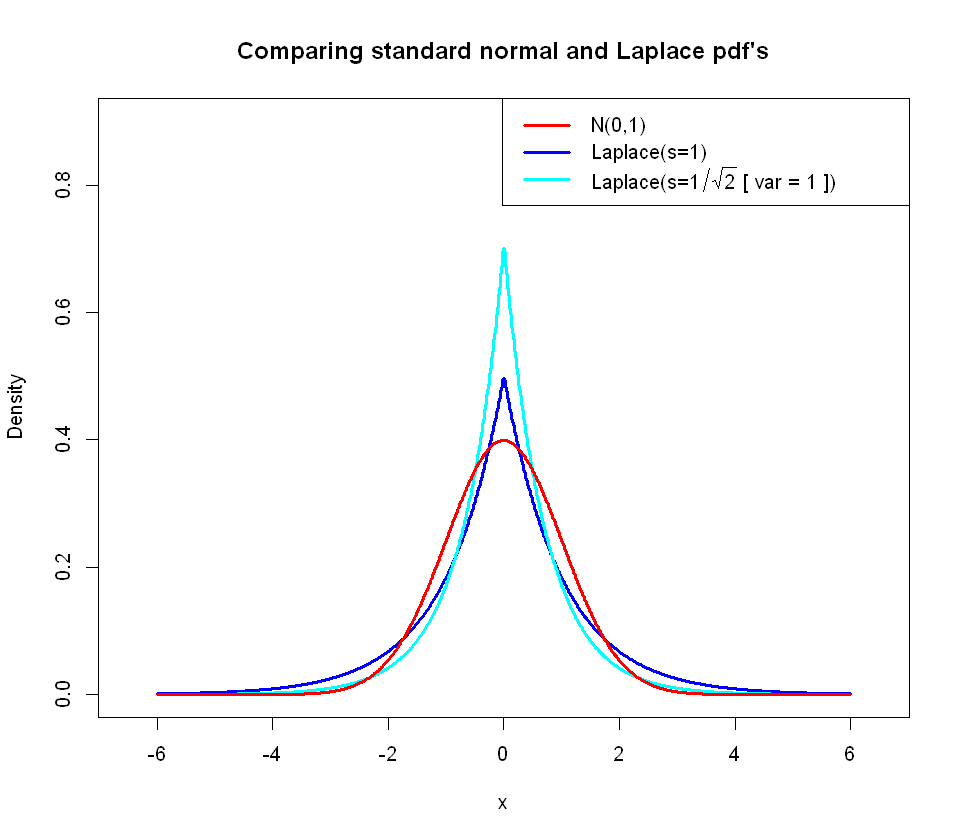

In [4]:
options(repr.plot.width=8,repr.plot.height=7)
u<-seq(-6,6,length=1000)
plot(u,dnorm(u),type="l",lwd=3.0,col="red",xlab="x",ylab="Density",xlim=c(-6.5,6.5),ylim=c(0,0.9),
    main="Comparing standard normal and Laplace pdf's")
lines(u,dlaplace(u),lwd=2.5,col="blue")
lines(u,dlaplace(u,sigma=1/sqrt(2)),lwd=2.5,col="cyan")
lines(u,dnorm(u),lwd=3.0,col="red")
legend("topright",c("N(0,1)",expression(paste("Laplace(",s,"=1)")),
                    expression(paste("Laplace(",s,"=",1/sqrt(2) ," [ var = 1 ])"))),lwd=2.5,col=c("red","blue","cyan"))

## Horseshoe distribution

The latent variable formulation of the Horsehoe is

$$
    \begin{aligned} 
    (\beta_i|\lambda_i, \tau) \sim N(0, \lambda_i^2\tau^2)\\[0.2cm]
     \lambda_i \sim \halfcauchydist(0, 1)\\[0.2cm]
     \tau \sim \halfcauchydist(0, 1)\\[0.2cm]
    \end{aligned}
$$

where $ \halfcauchydist(0, 1)$ is the half-Cauchy distribution. 

The horseshoe pdf has no closed form analytic expression. Here we see its shape, comapared to the Laplace.

In [5]:
#install.packages("LaplacesDemon",dependencies=TRUE,repos="https://cloud.r-project.org")
require(LaplacesDemon,quietly=TRUE)


Attaching package: 'LaplacesDemon'


The following objects are masked from 'package:extraDistr':

    dbern, dcat, ddirichlet, dgpd, dgpois, dinvchisq, dinvgamma,
    dlaplace, dpareto, pbern, plaplace, ppareto, qbern, qcat, qlaplace,
    qpareto, rbern, rcat, rdirichlet, rgpd, rinvchisq, rinvgamma,
    rlaplace, rpareto




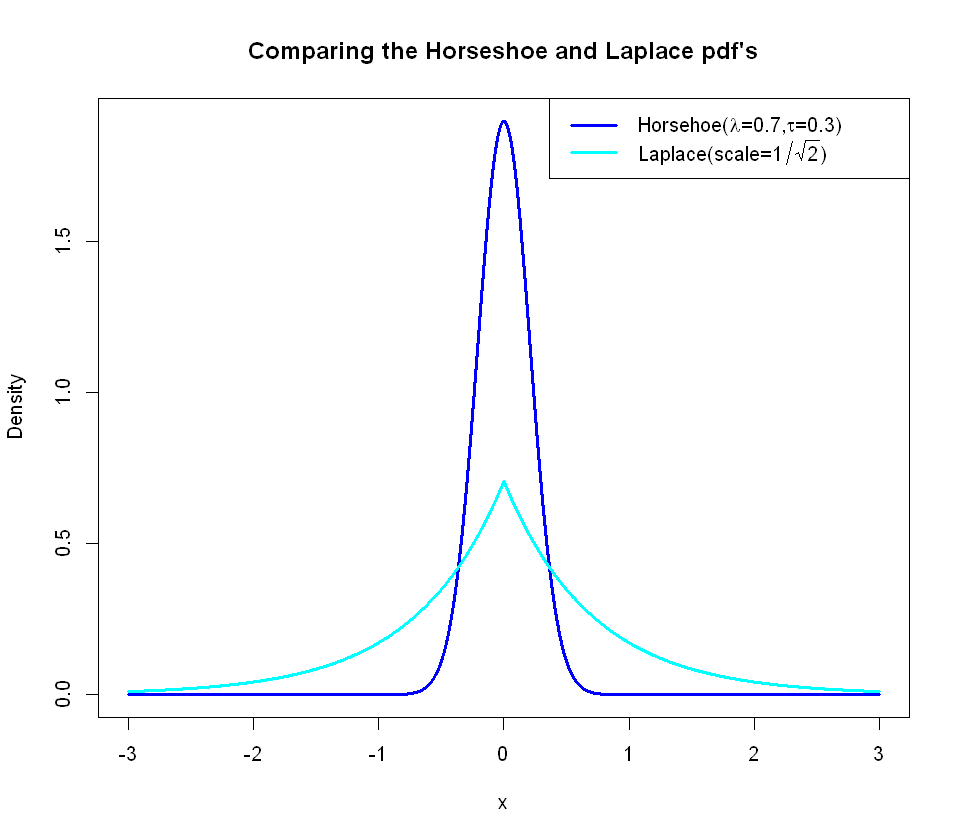

In [6]:
x<-seq(-3,3,length=3000)
y<-dhs(x,lambda=0.7,tau=0.3)
y.max<-max(y)
options(repr.plot.width=8,repr.plot.height=7)
plot(x,y,type="l",lwd=2.5,col="blue",xlab="x",ylab="Density",ylim=c(0,y.max),
    main="Comparing the Horseshoe and Laplace pdf's")
lines(x,dlaplace(x,scale=1/sqrt(2)),lwd=2.5,col="cyan")     # LaplacesDemon has another dlaplace()
legend("topright",c(expression(paste("Horsehoe(",lambda,"=0.7,",tau,"=0.3)")),
                    expression(paste("Laplace(",scale,"=",1/sqrt(2),")"))),
       lwd=2.5,col=c("blue","cyan"))